In [1]:
!pip install wordcloud
!pip install jieba
!pip install lxml
!pip install wordcloud

In [2]:
import jieba
#指定使用繁體辭典
jieba.set_dictionary('jieba_data/dict.txt.big')

In [3]:
import requests
from bs4 import BeautifulSoup

#設定request header
user_agent = "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/112.0.0.0 Safari/537.36"
my_headers = {
    'User-Agent': user_agent,
    "accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8",
    "accept-Language": "zh-TW,zh;q=0.9,en-US;q=0.8,en;q=0.7",
    "accept-encoding": "gzip, deflate, br",
    "Connection": "keep-alive",
    "cache-control": "no-cache",
    "Accept-Charset": "UTF8,utf-8;q=0.7,*;q=0.7"
}

# 爬取新聞網站標題和連結
url = "https://money.udn.com/rssfeed/news/1001/5588/10511?ch=money"
response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")
items = soup.findAll("item")

i = 1
for item in items:
    title = item.title.text.strip()
    title_link = item.guid.text
    print("%s, %s, %s" % (i, title, title_link))
    i += 1

1, 美企投資大陸限令 將啟動, https://money.udn.com/money/story/10511/7115236
2, 中國前駐美大使：美國想跟中國對話 不能只靠說, https://money.udn.com/money/story/10511/7115045
3, FT：美外洩機密文件稱 中國大陸正在打造劫持敵方衛星的網路武器, https://money.udn.com/money/story/10511/7114416
4, 紐時：習近平認接觸無成效 雙管齊下應對美國, https://money.udn.com/money/story/10511/7114315
5, 葉倫談美中 國安先於經濟, https://money.udn.com/money/story/10511/7112782
6, 葉倫談美中關係：國安優先於經濟, https://money.udn.com/money/story/10511/7111981
7, 美對陸出口限制 科林研發：沒擔心的那麼嚴, https://money.udn.com/money/story/10511/7111045
8, 違規賣硬碟給華為 希捷遭美國政府重罰93億元, https://money.udn.com/money/story/10511/7110369
9, 葉倫演講 聚焦美中競爭, https://money.udn.com/money/story/10511/7109700
10, 美國針對TikTok立法影響範圍太大 反遭科技公司抵制, https://money.udn.com/money/story/10511/7109534
11, 美國反制大陸影響力 官員：與夥伴付出相當大努力, https://money.udn.com/money/story/10511/7109437
12, 美眾院委員會將進行兵棋推演 模擬中共武力犯台, https://money.udn.com/money/story/10511/7108941
13, 中國在美設祕密警局  遍布舊金山與休士頓等大城, https://money.udn.com/money/story/10511/7108233
14, 布林肯：可推動美中關係  但北京須先表明意圖, https://money.udn.

/opt/conda/lib/python3.10/site-packages/bs4/builder/__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  warnings.warn(


In [4]:
#爬取每則新聞內文
import requests
from bs4 import BeautifulSoup
from lxml import html
import random
import time

url = "https://money.udn.com/rssfeed/news/1001/5588/10511?ch=money"
response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")
items = soup.findAll("item")

all_content = []
for item in items:
    title_link = item.guid.text
    print(title_link)
    content_response = requests.get(title_link)
    content_tree = html.fromstring(content_response.content)
    content = content_tree.xpath('//*[@id="article_body"]//p[not(@style)]')
    
    article_text = ""
    for p in content:
        article_text += p.text_content()
        
    all_content.append(article_text)
    
    sleep_time = random.randint(3, 10)
    print("sleep time: %s sec"%(sleep_time))
    time.sleep(sleep_time)

print(all_content)


https://money.udn.com/money/story/10511/7115236
sleep time: 3 sec
https://money.udn.com/money/story/10511/7115045
sleep time: 4 sec
https://money.udn.com/money/story/10511/7114416
sleep time: 7 sec
https://money.udn.com/money/story/10511/7114315
sleep time: 6 sec
https://money.udn.com/money/story/10511/7112782
sleep time: 4 sec
https://money.udn.com/money/story/10511/7111981
sleep time: 3 sec
https://money.udn.com/money/story/10511/7111045
sleep time: 4 sec
https://money.udn.com/money/story/10511/7110369
sleep time: 10 sec
https://money.udn.com/money/story/10511/7109700
sleep time: 9 sec
https://money.udn.com/money/story/10511/7109534
sleep time: 5 sec
https://money.udn.com/money/story/10511/7109437
sleep time: 7 sec
https://money.udn.com/money/story/10511/7108941
sleep time: 7 sec
https://money.udn.com/money/story/10511/7108233
sleep time: 10 sec
https://money.udn.com/money/story/10511/7106721
sleep time: 10 sec
https://money.udn.com/money/story/10511/7105643
sleep time: 6 sec
https:/

In [5]:
import re

re_all_content = []
for content in all_content:
    re_all_content.append(re.sub(r'\r\n|\n', '', content))

re_all_content_string = ''.join(re_all_content)
print(re_all_content_string)

彭博資訊報導，美國總統拜登力求在未來幾周簽署行政命令，限制美企對中國大陸關鍵經濟領域的投資。拜登政府討論此措施近兩年，如今計劃在5月19日開幕的G7日本峰會前後行動。知情人士說，美國一直向G7夥伴簡報擬採取的高科技業投資限制措施，並希望在下月峰會上獲得各方背書，即使其他國家預料不會同時宣布類似措施。其中一位知情人士說，最有可能的順序是，在盟友表達支持後，拜登很快簽署行政命令。此舉代表美國對大陸的經濟戰進入新階段：前美國總統川普對中國進口商品加徵關稅，拜登近來不斷加大對美國關鍵技術出口的限制，接下來華府目標將放在兩國之間的資本流動。報導指出，擬議中的行政命令將涵蓋半導體、人工智慧（AI）和量子運算等，聚焦美企在管理上發揮積極作用的投資領域。受限的包括風險投資和私募股權，以及特定形式的技術轉讓和合資企業。涉及起草行政命令的官員表示，目標是潛在的新投資，而非現有投資。某些類型的投資將完全禁止，其它類型則將要求企業通報美國政府。有關細節將在行政命令發布後的一系列法規中闡述。美國官員表示，投資限制打算扼殺可能提升中國軍力的關鍵融資和技術。中國迄今拒絕美國提議高層對話，中國前駐美大使崔天凱今天以台灣為例，批評美方說一套、做一套，何以取信於人。他說，「對話如果沒有誠意，不能平等相待，也不見得能解決問題」。崔天凱21日出席在上海舉辦的「中國式現代化與世界」藍廳論壇，期間接受官媒央視博主「玉淵譚天」專訪談近期陷入歷史低位的中美關係。當被問及中國學者鄭永年近日提到，「中美關係很重要，但對中美雙方來說，並不是唯一的外交關係」，崔天凱說，中國、美國這兩個這麼大的國家，作為世界前兩大經濟體，兩國還都是聯合國安理會常任理事國，在世界上也有各自的重要性。這兩個國家之間按理說應該有更多的交往，包括政府之間的交往，包括高層的交往，這種交往應該是相當頻繁的，相當經常的，「但是現在很難做到這一點」。崔天凱認為這主要有兩個問題：第一個就是「能不能真正做到相互尊重」。兩個國家之間交往跟兩個人之間交往一樣，如果不是平等相待，相互尊重，怎麼交往下去？但是美國有些人，他的習慣思維就是說我要強勢來對付你，言下之意他是強勢，就要把對方打成弱勢。用他們的話說就是要從實力地位出發來和你交往，老是這種心態，不能平等相待，不能尊重對方，怎麼交往？他說，中國有句古話叫「智者不惑，仁者不憂，勇者不懼」。你要是智者、仁者、勇者，你

In [6]:
import jieba

# 準備停用詞庫
with open(file='jieba_data/stop_words.txt', mode='r', encoding='utf-8') as file:
    stop_words = file.read().split('\n')

# 使用jieba進行分詞
seg_words_list = jieba.lcut(re_all_content_string)
    
# 過濾停用詞
seg_stop_words_list = [term for term in seg_words_list if term not in stop_words]

print(seg_stop_words_list)

Building prefix dict from /home/jovyan/work/jieba_data/dict.txt.big ...
Loading model from cache /tmp/jieba.ud3c40470d3518910bfd0dc86d865fad4.cache
Loading model cost 0.895 seconds.
Prefix dict has been built successfully.


['彭博', '資訊', '報導', '美國', '總統', '拜登', '力求', '未來', '幾周', '簽署', '行政命令', '限制', '美企對', '中國', '大陸', '關鍵', '經濟', '領域', '投資', '拜登', '政府', '討論', '此', '措施', '近兩年', '如今', '計劃', '5', '19', '開幕', 'G7', '日本', '峰會', '前後', '行動', '知情', '美國', '一直', 'G7', '夥伴', '簡報', '擬', '採取', '高科技', '業', '投資', '限制', '措施', '希望', '下', '月峰', '會上', '獲得', '各方', '背書', '國家', '預料', '不會', '同時', '宣布', '類似', '措施', '一位', '知情', '最有', '順序', '盟友', '表達', '支持', '拜登', '很快', '簽署', '行政命令', '此舉', '代表', '美國', '大陸', '經濟', '戰', '進入', '階段', '：', '前', '美國', '總統', '川普對', '中國', '進口商品', '加徵', '關稅', '拜登', '近來', '不斷', '加大', '美國', '關鍵技術', '出口', '限制', '接下來', '華府', '目標', '放在', '兩國之間', '資本', '流動', '報導', '擬議', '行政命令', '涵蓋', '半導體', '人工智慧', 'AI', '量子', '運算', '聚焦', '美企在', '管理', '發揮', '積極', '作用', '投資', '領域', '受限', '風險投資', '私募', '股權', '特定', '形式', '技術轉讓', '合資企業', '涉及', '起草', '行政命令', '官員', '目標', '潛在', '投資', '非', '現有', '投資', '某些', '類型', '投資', '完全', '禁止', '其它', '類型', '則', '將要', '求', '企業', '通報', '美國政府', '有關', '細節', '將在', '行政命令', '發布', '一系列', '法規', '闡述', '美國', '官員'

In [7]:
# 清除 matplotlib 快取
import matplotlib
print(matplotlib.get_configdir())
!ls -la /home/jovyan/.config/matplotlib
!rm -rf /home/jovyan/.cache/matplotlib

/home/jovyan/.config/matplotlib
total 8
drwsrwsr-x 2 jovyan users 4096 Apr 17 11:25 .
drwsrwsr-x 3 jovyan users 4096 Apr 17 11:25 ..


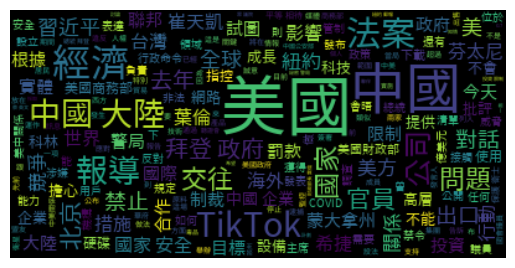

In [8]:
# 繪製文字雲 by generate
from wordcloud import WordCloud
import matplotlib.pyplot as plt

seg_words = ' '.join(seg_stop_words_list)
wordcloud = WordCloud(font_path='fonts/TaipeiSansTCBeta-Regular.ttf').generate(seg_words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

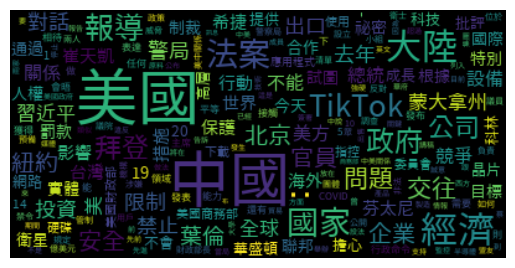

In [9]:
# 繪製文字雲 by generate_from_frequencies
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

seg_stop_counter = Counter(seg_stop_words_list)

wordcloud = WordCloud(font_path='fonts/TaipeiSansTCBeta-Regular.ttf').generate_from_frequencies(seg_stop_counter)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('udn_news_wc.png', dpi=300)
plt.show()